<a href="https://colab.research.google.com/github/arseniybelkov/ml_vorontsov/blob/master/task11/task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'}, 
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'}, 
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'}, 
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'}, 
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'}, 
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия', 
                          'Перцептрон', 
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия', 
                              'Перцептрон', 
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна', 
                              'SVM']}
task = dict()
# task['mail'] = input(prompt='Enter your mail: ')
task['mail'] = "belkov.as@phystech.edu"
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()


task

{'mail': 'belkov.as@phystech.edu',
 'id': 3601992552,
 'type': 'classification',
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['Метод Парзеновского окна',
  'Логистическая регрессия',
  'Метод потенциальных функций']}

In [2]:
data_url = 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'
methods = ['Метод Парзеновского окна', 'Логистическая регрессия', 'Метод потенциальных функций']

In [3]:
SEED = 0xBadCaffe


import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Union, Dict

def fix_seed(seed=0xBadCaffe):
    random.seed(seed)
    np.random.seed(seed)

fix_seed(SEED)

## Breast Cancer Dataset exploration  
[link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [4]:
from sklearn.datasets import load_breast_cancer
raw_dataset = load_breast_cancer(as_frame=True)
raw_df = raw_dataset.data
raw_df['target'] = raw_dataset.target

raw_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
raw_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


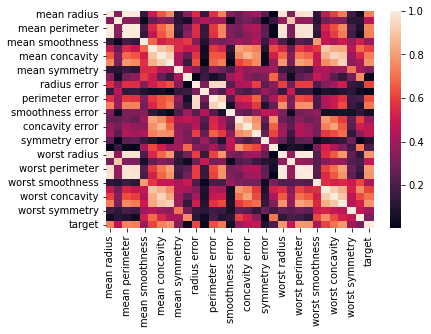

In [6]:
raw_corr_matrix = raw_df.corr(method='spearman')
sns.heatmap(raw_corr_matrix.abs())

## Data preprocessing
At the aforepresented heatmap of correlation matrix there can be seen some highly correlated (i.e. abs(corr) >= 0.95) features.  
We'll have a look at their scatter & pair plots, in order to see the dependencies between them and after that some of them will be removed from dataset. This step is crucial in order to avoid overfitting.

But firstly the dataset needs to be splitted into train + val & test sets, in order to prevent data leakage and to make quality estimation fair.  

The split will be done with staritification by target, so the target distrbution will be preserved.

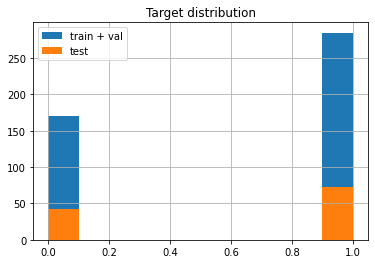

In [7]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=SEED, stratify=raw_df['target'])


train_val_df['target'].hist(label='train + val')
test_df['target'].hist(label='test')
plt.title('Target distribution')
plt.legend()

We'll have single test set, and K cross validations, the final metrics will be evaluated as aggregation (e.g. voting or averaging) of K trained models.

In [8]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED) # K == 5

X, Y = train_val_df[list(filter(lambda c: c != 'target', raw_df.columns))].copy(), train_val_df['target'].copy()

split = [(Y.index[train_ids].tolist(), Y.index[val_ids].tolist()) for train_ids, val_ids in skf.split(train_val_df, train_val_df['target'])]

So, the data split is done, and now we can dive into analysis, exploration and so on...  
Let's check covariate features  
We'll drop features with correlation > 0.8 (maybe later the throshold will be searched via CV)

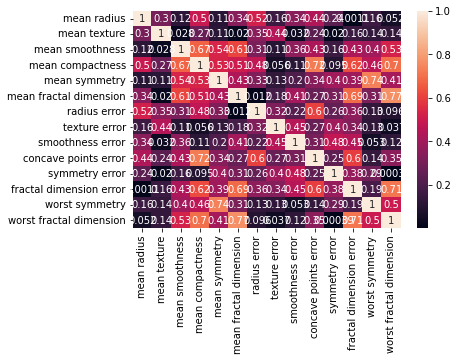

In [9]:
corr_matrix = train_val_df.drop('target', axis=1).corr(method='spearman')
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.abs().shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

sns.heatmap(train_val_df.drop(to_drop + ['target'], axis=1).corr(method='spearman').abs(), annot=True)

Stats from train set should be preserved if we want to apply preprocessing (e.g. normalization) on val & test sets.

In [10]:
split_statistics = [X.loc[fold_ids[0]].describe() for fold_ids in split]

In [11]:
# sns.pairplot(data=train_val_df.drop(to_drop, axis=1), hue='target') # takes to much time

# FIT-PREDICT
<img src="https://64.media.tumblr.com/9917148c5b32fbc79f11657ba8914980/9cd02a3a7d170a6b-f7/s540x810/a860f74e48e6c9ebf7022c1f03fee131e99e84ad.gif">  


We need to train 3 models:  
- Logistic Regression
- Method of Parzen Winbdow  
- Method of potential functions

Each will be trained on 5-fold CV sets, hyperparameters will be searched using [Optuna Framework](https://optuna.org/).

In [12]:
try:
    import optuna
except ModuleNotFoundError:
    !pip install optuna --no-cache-dir > pip_log.txt # pop_log.txt to avoid long tracebacks
    import optuna

# OPTUNA VERBOSITY
optuna.logging.set_verbosity(optuna.logging.WARNING)

from tqdm import tqdm
from typing import Tuple, Sequence, Callable, List, Optional
from functools import partial



class DataPipe:
    def __init__(self, data, target, split: List[List], *funcs: Callable):
        self.pipeline = funcs
        self.split = split
        self.data = data
        self.target = target
        assert len(self.data) == len(self.target), (len(self.data), len(self.target))

    def _get_set(self, split_id: int, set_id: int) -> Tuple:
        return self.data.loc[split[split_id][set_id]], self.target.loc[split[split_id][set_id]]

    def _transform(self, split_id: int, set_id: int) -> Tuple:
        data, target = self._get_set(split_id, set_id)
        for f in self.pipeline:
            data, target = f(data, target)
        return data, target

    def get_train_set(self, split_id) -> Tuple:
        return self._get_set(split_id, 0)

    def get_val_set(self, split_id) -> Tuple:
        return self._get_set(split_id, 1)

    def transform_train(self, split_id) -> Tuple:
        return self._transform(split_id, 0)

    def transform_val(self, split_id) -> Tuple:
        return self._transform(split_id, 1)

    def apply(self, data: pd.DataFrame, target: pd.Series) -> Tuple:
        if pipeline is None:
            pipeline = self.pipeline
        for f in pipeline:
            data, target = f(data, target)
        return data, target

    def __call__(self, *args, **kwargs) -> Tuple:
        return self.apply(*args, **kwargs)

    def __getitem__(self, idx: int) -> Callable:
        return self.pipeline[idx]
    
    def __repr__(self):
        return f"{self.__class__.__name__}({self.pipeline})"

    def __str__(self):
        return self.__repr__()

# TODO: rewrite with standart scaler
# from sklearn.preprocessing import StandartScaler
class Normalize:
    def __init__(self, split, stats):
        self.split = split
        self.stats = stats
        # self.scalers = [StandartScaler() for _ in self.split]

    def __call__(self, x, y, split_id: int=None):
        ids = sorted(x.index.tolist())
        if split_id is not None:
            return x.apply(lambda col: (col - self.stats[split_id][col.name]['mean'])\
                           / self.stats[split_id][col.name]['std']), y

        for i, (ids_tr, ids_val) in enumerate(self.split):
            if ids == sorted(ids_tr):
                return x.apply(lambda col: (col - x[col.name].describe()['mean'])\
                               / x[col.name].describe()['std']), y
            elif ids == sorted(ids_val):
                return x.apply(lambda col: (col - self.stats[i][col.name]['mean'])\
                               / self.stats[i][col.name]['std']), y
    

def drop_columns(x: pd.DataFrame, y: pd.Series, to_drop: Sequence[str]) -> Tuple[pd.DataFrame, pd.Series]:
    return x.drop(to_drop, axis=1), y


data_pipeline = DataPipe(X, Y, split,
                         partial(drop_columns, to_drop=to_drop),
                         Normalize(split, split_statistics)
                         )

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score, recall_score, precision_score


def compute_metrics(y, probas) -> tuple:
    accuracy = accuracy_score(y, probas[:, 1] > 0.5)
    f1 = f1_score(y, probas[:, 1]  > 0.5)
    bce = log_loss(y, probas)
    roc_auc = roc_auc_score(y, probas[:, 1])
    precision = precision_score(y, probas[:, 1]  > 0.5)
    recall = recall_score(y, probas[:, 1] > 0.5)
    return accuracy, f1, bce, roc_auc, precision, recall # going all out

def objective_logreg(trial, x_tr, y_tr, x_val, y_val,
                     model_params: dict, architecture_module) -> tuple:
    C = trial.suggest_float("C", 1e-6, 1e6)
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    # train
    model = architecture_module(C=C, l1_ratio=l1_ratio, **model_params)
    model = model.fit(x_tr, y_tr)

    # eval
    probas = model.predict_proba(x_val)

    acc, f1, bce, roc_auc, prec, rec = compute_metrics(y_val, probas)
    return acc, f1, bce, roc_auc, prec, rec

In [14]:
def train_logreg(data_pipeline: DataPipe, objective, model_params: dict,
                 drop_params: Optional[List[str]]=None, architecture_module=LogisticRegression):

    studies = {}
    models = {}
    metrics = {'accuracy': {}, 'f1': {}, 'bce': {}, 'roc_auc': {}, 'prec': {}, 'rec': {}}
    proba_th = 0.5

    for i, (fold_stats, fold_ids) in enumerate(zip(split_statistics, split)):
        print(f"### SPLIT # {i} ###")
        x_tr, y_tr = data_pipeline.transform_train(i)
        x_val, y_val = data_pipeline.transform_val(i)

        studies[i] = optuna.create_study(directions=['maximize', 'maximize', 'minimize',
                                                    'maximize', 'maximize', 'maximize'])
        studies[i].optimize(lambda trial: objective(trial, x_tr, y_tr, x_val, y_val,
                                                    model_params, architecture_module),
                            n_trials=100, show_progress_bar=True, n_jobs=-1)

        _study_params = studies[i].best_trials[0].params.copy()

        if drop_params:
            for p in drop_params:
                _ = _study_params.pop(p, None)
        models[i] = architecture_module(**_study_params, **model_params)

        models[i] = models[i].fit(x_tr, y_tr)

        # eval
        metrics = predict_logreg(models, data_pipeline, i, metrics)
        print(studies[i].best_trials[0].params)

    df_metrics = pd.DataFrame(metrics).T
    return models, studies, df_metrics


def predict_logreg(models, data_pipeline, i, metrics: dict) -> pd.DataFrame:
    """
    i -- split id
    """
    x_tr, y_tr = data_pipeline.transform_train(i)
    x_val, y_val = data_pipeline.transform_val(i)

    probas = models[i].predict_proba(x_val)
    accuracy, f1, bce, roc_auc, prec, rec = compute_metrics(y_val, probas)

    probas_tr = models[i].predict_proba(x_tr)
    accuracy_tr, f1_tr, bce_tr, roc_auc_tr, prec_tr, rec_tr = compute_metrics(y_tr, probas_tr)

    metrics['accuracy'].update({f'tr{i}': accuracy_tr, f'val{i}': accuracy})
    metrics['f1'].update({f'tr{i}': f1_tr, f'val{i}': f1})
    metrics['bce'].update({f'tr{i}': bce_tr, f'val{i}': bce})
    metrics['roc_auc'].update({f'tr{i}': roc_auc_tr, f'val{i}': roc_auc})
    metrics['prec'].update({f'tr{i}': prec_tr, f'val{i}': prec})
    metrics['rec'].update({f'tr{i}': rec_tr, f'val{i}': rec})
    return metrics

In [15]:
model_params = {'solver': 'saga', 'n_jobs': -1, 'penalty': 'elasticnet', 'max_iter': 10000}
models, studies, metrics = train_logreg(data_pipeline, objective_logreg, model_params, drop_params=['n_components'])

### SPLIT # 0 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 886232.6694990549, 'l1_ratio': 0.06275158661686198}
### SPLIT # 1 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 3267.3951305815817, 'l1_ratio': 0.018145684894183778}
### SPLIT # 2 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 686337.2390599222, 'l1_ratio': 0.27578713970977753}
### SPLIT # 3 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 72874.85959269221, 'l1_ratio': 0.09220990765632398}
### SPLIT # 4 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 3685.9231362997843, 'l1_ratio': 0.1065159106667618}


In [16]:
metrics

,tr0,val0,tr1,val1,tr2,val2,tr3,val3,tr4,val4
accuracy,0.964286,0.978022,0.964286,0.989011,0.975275,0.945055,0.980769,0.945055,0.983516,0.901099
f1,0.971429,0.982456,0.971554,0.991150,0.980306,0.955752,0.984749,0.956522,0.986957,0.920354
bce,0.074522,0.063425,0.082055,0.043738,0.056267,0.235352,0.062178,0.138465,0.048681,0.269209
roc_auc,0.996388,0.997936,0.995582,0.999484,0.998097,0.975232,0.997033,0.988648,0.997968,0.982972
prec,0.973568,0.982456,0.969432,1.000000,0.978166,0.964286,0.978355,0.948276,0.978448,0.928571
rec,0.969298,0.982456,0.973684,0.982456,0.982456,0.947368,0.991228,0.964912,0.995614,0.912281


It seems we've encountered overfitting on some CV folds.  
The cause of poor val quality may also be distribution shift between train and validation sets

In the cell below, there can be seen no distribution discrepancy between train and val sets  
which suggests model overfitting  
(you can look at distribution of all folds, by specifying `fold_id` - id of split (0-4))

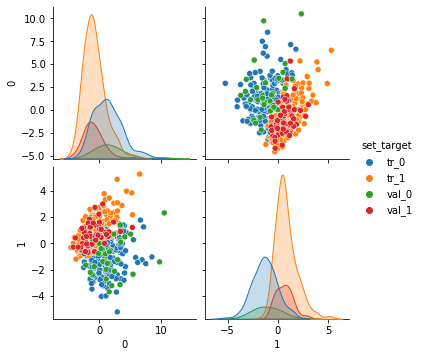

In [17]:
fold_id = 2

# it does not really matter whether we look at normalized features or their orig values,
# because normalization of val set is done using train set statistics
x_tr, y_tr = data_pipeline.transform_train(fold_id)
x_val, y_val = data_pipeline.transform_val(fold_id)

from sklearn.decomposition import PCA
pca = PCA(2)

pca_tr = pca.fit_transform(x_tr)
pca_val = pca.transform(x_val)

ds = pd.DataFrame(np.concatenate([pca_tr, pca_val], axis=0))
ds_tgt = pd.concat([y_tr, y_val], axis=0)

ds['set_target'] = [f'tr_{ds_tgt.loc[i]}' if i in data_pipeline.split[fold_id][0] else f'val_{ds_tgt.loc[i]}' for i in ds_tgt.index]


sns.pairplot(data=ds, hue='set_target')

But since regularization is applied, the problem of poor validation quality likely comes from data.  
Probably dropping covariate columns was not enough to increase model generalization ability.  

Let's have a closer look at features of raw dataframe.  
It's obvious that features `mean smth` are important, which cannot be said about `worst ...` and `error`.  

In [18]:
raw_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In order to decide which features to dro, we should look at their impact on the data linear separability. 

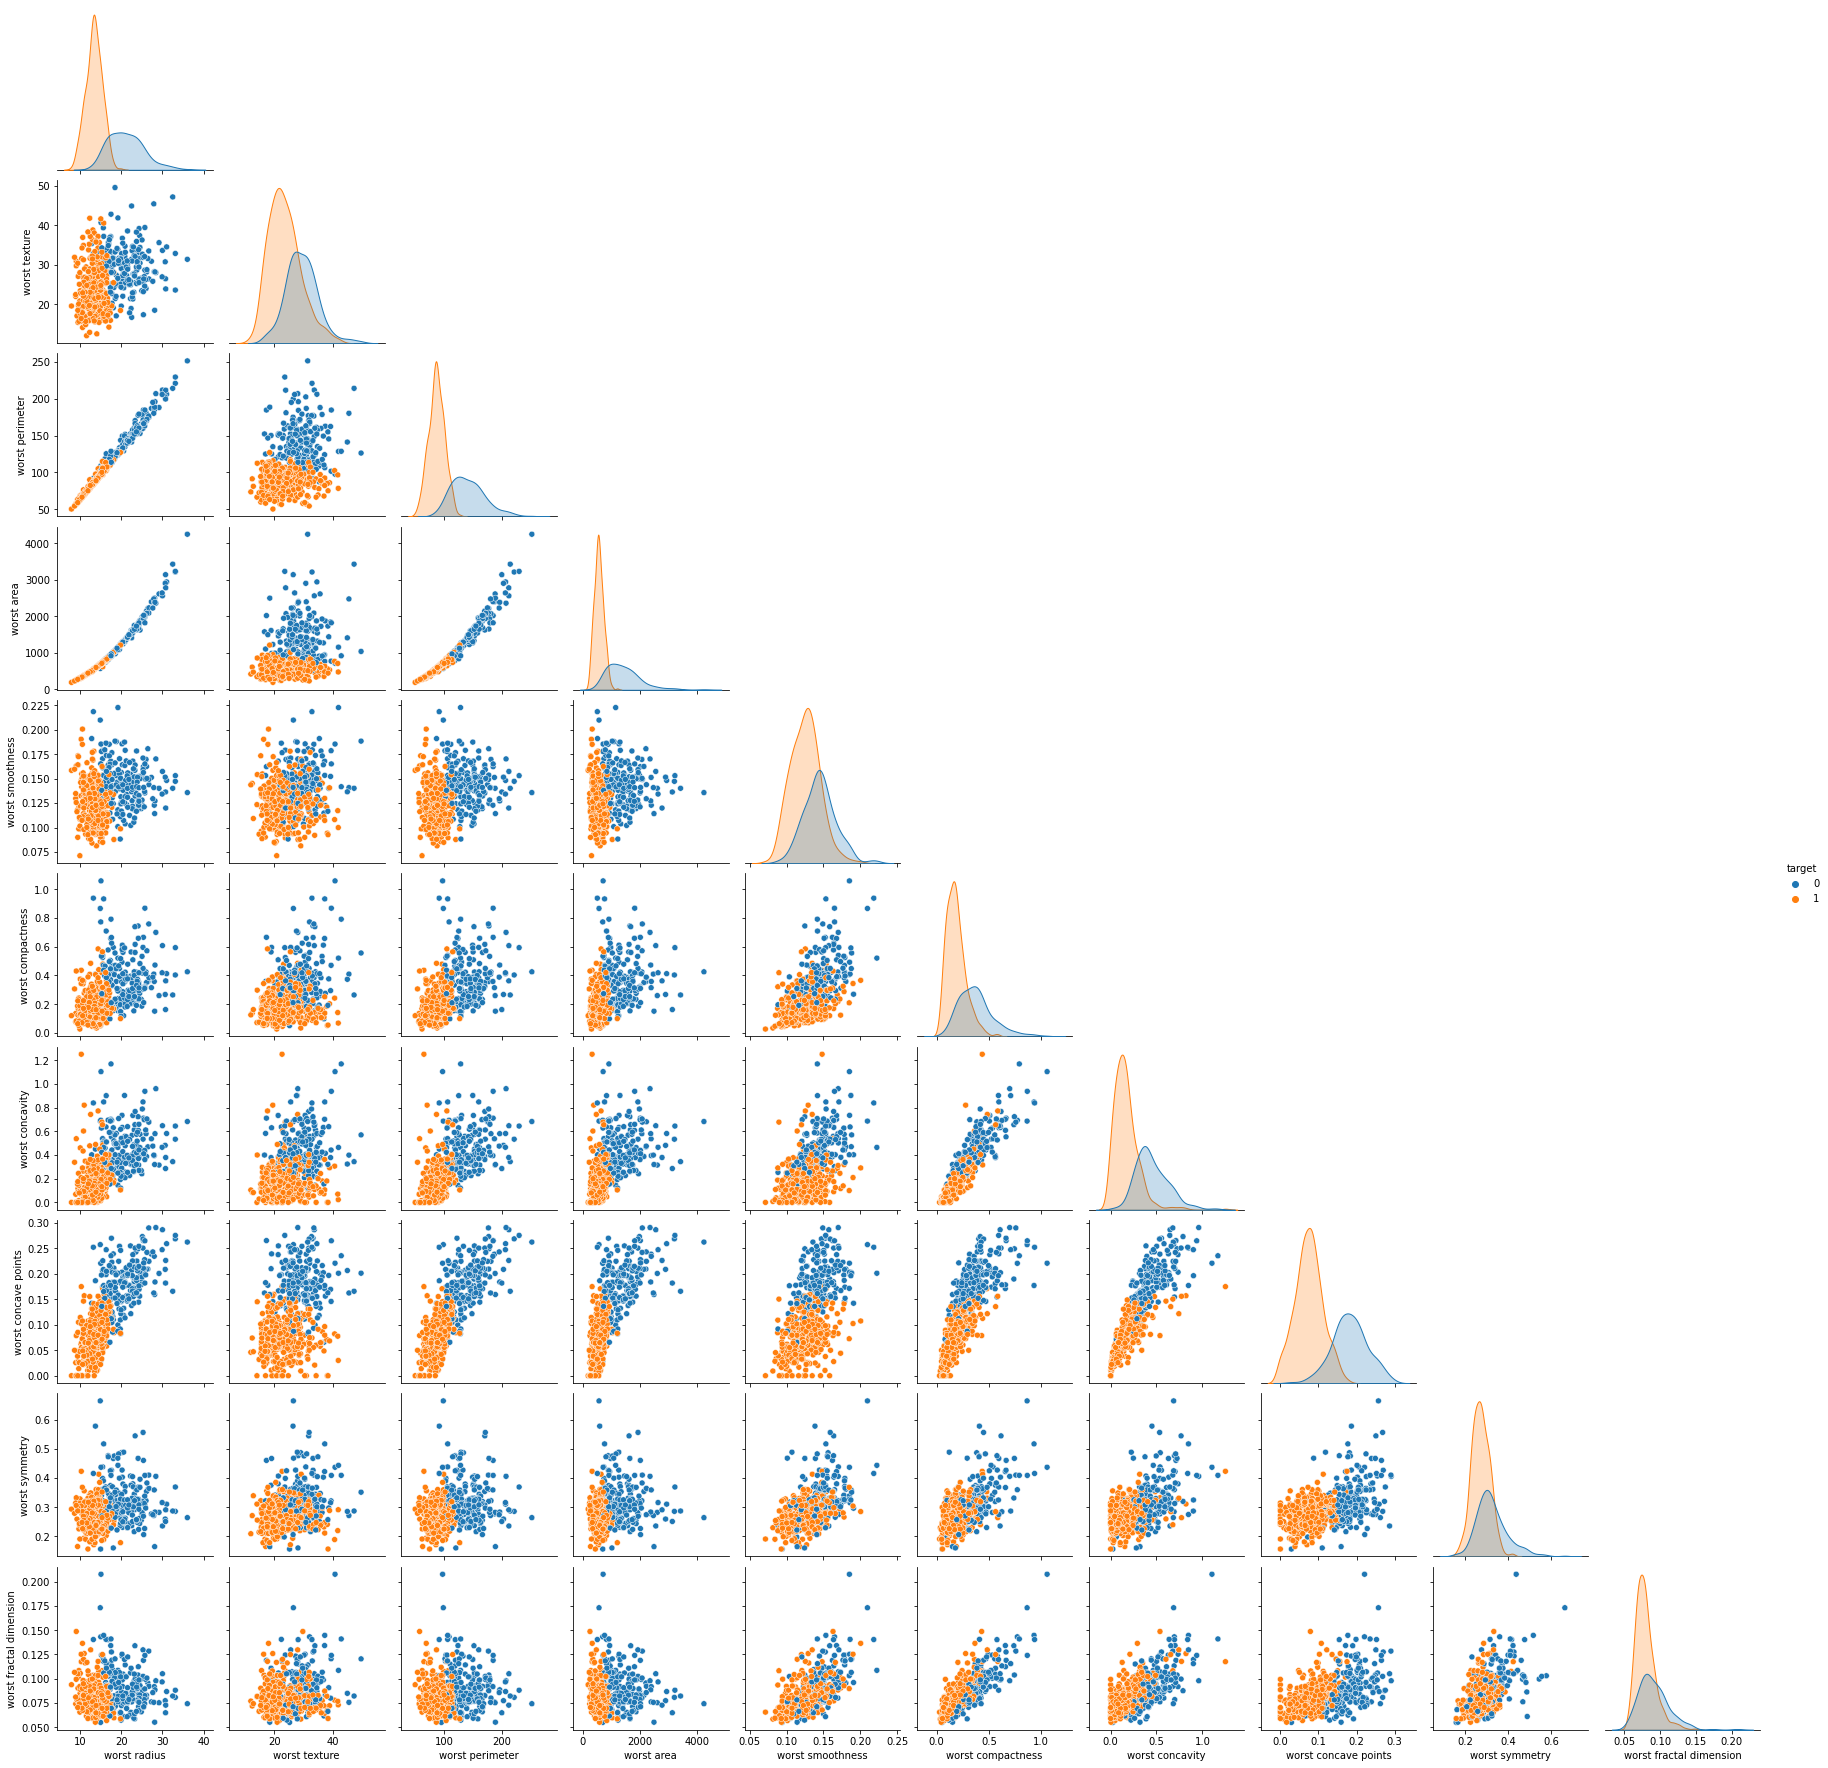

In [19]:
sns.pairplot(data=raw_df[[c for c in raw_df.columns if 'worst' in c or c == 'target']], hue='target', corner=True)

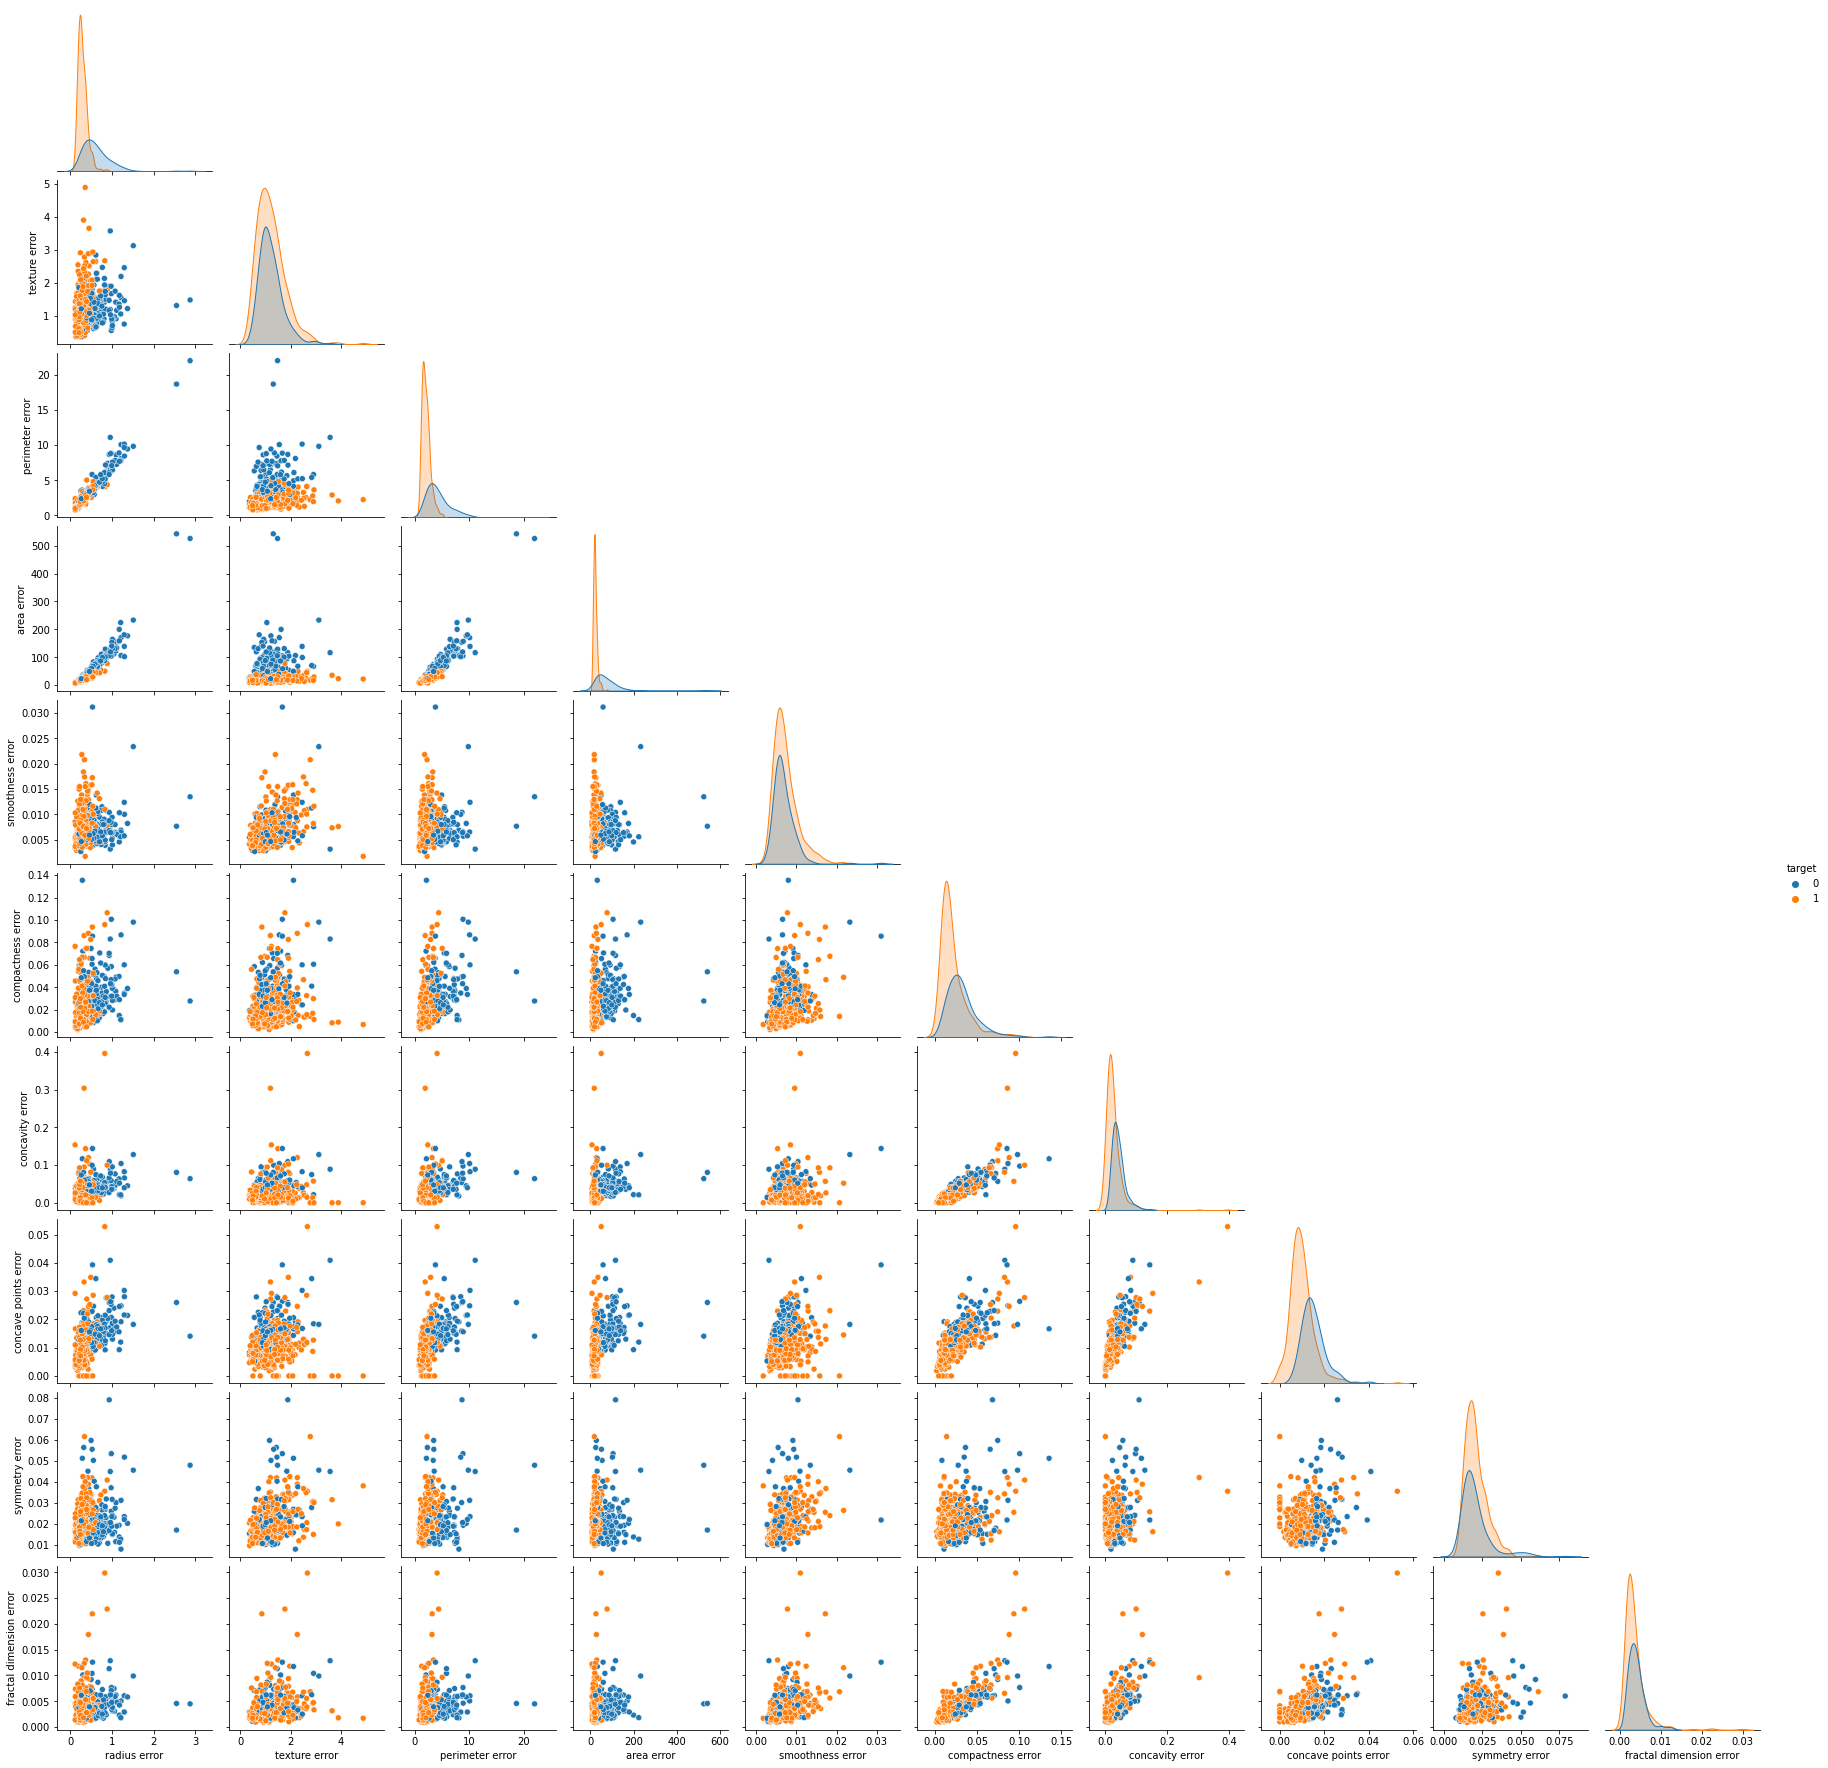

In [20]:
sns.pairplot(data=raw_df[[c for c in raw_df.columns if 'error' in c or c == 'target']], hue='target', corner=True)

From the pairplots (esp. from their diag elements) of `worst` and `error` features,  
we can see that latter contributes almost none to separability (the distribution of features for two classes does not differ much).  
So we can exclude `error` columns from the dataset.  
 
And since we reduce the number of features, increasing correlation threshold from *0.8* to *0.9* should be useful.

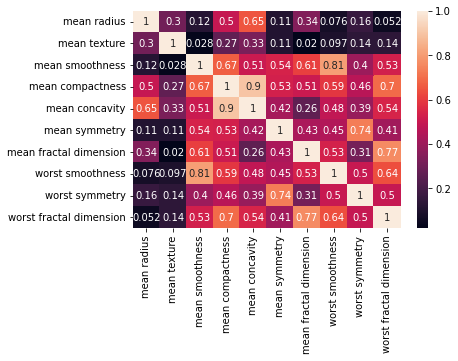

In [21]:
error_features = [c for c in raw_df.columns if 'error' in c]
corr_matrix = train_val_df.drop('target', axis=1).drop(error_features, axis=1).corr(method='spearman')
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.abs().shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)] + error_features

error_drop = to_drop.copy()

sns.heatmap(train_val_df.drop(to_drop + ['target'], axis=1).corr(method='spearman').abs(), annot=True)

We've removed more features than before (10 left now vs 14 before)

In [22]:
noerror_pipeline = DataPipe(X, Y, split,
                         partial(drop_columns, to_drop=to_drop),
                         Normalize(split, split_statistics)
                         )

model_params = {'solver': 'saga', 'n_jobs': -1, 'penalty': 'elasticnet', 'max_iter': 10000}
models_ne, studies_ne, metrics_ne = train_logreg(noerror_pipeline, objective_logreg, model_params)

### SPLIT # 0 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 824283.6111434158, 'l1_ratio': 0.6920820192233849}
### SPLIT # 1 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 771536.6770078832, 'l1_ratio': 0.5741750152080689}
### SPLIT # 2 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 1413.4323665241886, 'l1_ratio': 0.6299471314248993}
### SPLIT # 3 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 444894.5842906028, 'l1_ratio': 0.7766845619336428}
### SPLIT # 4 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 14170.314850168905, 'l1_ratio': 0.415710615870712}


In [23]:
def plot_metrics(metrics1: dict, metrics2: dict, label1: str, label2: str) -> None:
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    metrics_idx = ((*metrics1.index.to_list()[:3],),
               (*metrics1.index.to_list()[3:],))
    for i in range(2):
        for j in range(3):
            ax[i, j].plot(metrics1.loc[metrics_idx[i][j]])
            ax[i, j].plot(metrics2.loc[metrics_idx[i][j]])
            ax[i, j].legend([label1, label2])
            ax[i, j].set_title(metrics_idx[i][j])
            _vlines_idxs = [f'val{i}' for i in range(5)]
            vline_ymax = [max((m1, m2)) for m1, m2 in zip(metrics2[_vlines_idxs].loc[metrics_idx[i][j]],
                            metrics1[_vlines_idxs].loc[metrics_idx[i][j]])]

            vline_ymin = [min((m1, m2)) for m1, m2 in zip(metrics2[_vlines_idxs].loc[metrics_idx[i][j]],
                            metrics1[_vlines_idxs].loc[metrics_idx[i][j]])]
            
            ax[i, j].vlines(_vlines_idxs, ymax=vline_ymax, ymin=vline_ymin, linestyle=':')

We can see that perfomance on validation sets became better.
It is worth noting that regularization parameters `C` obtained on CV is about ${10^4 \ →}$ almost no regularization was applied and hence we could get rid of it.

In [24]:
metrics_ne

,tr0,val0,tr1,val1,tr2,val2,tr3,val3,tr4,val4
accuracy,0.975275,0.978022,0.967033,0.989011,0.975275,0.934066,0.972527,0.989011,0.978022,0.956044
f1,0.980392,0.982456,0.973799,0.991304,0.980306,0.947368,0.978166,0.991304,0.982533,0.964912
bce,0.101974,0.082672,0.108776,0.052959,0.064554,0.304978,0.104345,0.072055,0.091951,0.131627
roc_auc,0.990454,0.995356,0.989583,0.998968,0.996453,0.970072,0.989745,0.996904,0.991873,0.987100
prec,0.974026,0.982456,0.969565,0.982759,0.978166,0.947368,0.973913,0.982759,0.978261,0.964912
rec,0.986842,0.982456,0.978070,1.000000,0.982456,0.947368,0.982456,1.000000,0.986842,0.964912


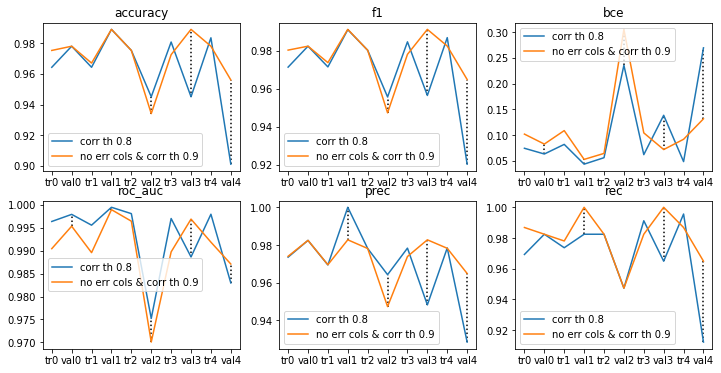

In [25]:
plot_metrics(metrics, metrics_ne, "corr th 0.8", "no err cols & corr th 0.9") # black dot lines connects val metrics

Here we can see no significant discrepancy between weights so it also proves that there's no need in regularization

Text(0.5, 0, 'weight id')

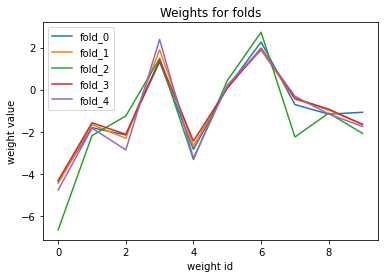

In [26]:
for i in range(5):
    plt.plot(models_ne[i].coef_[0], label=f"fold_{i}")
plt.legend()
plt.title('Weights for folds')
plt.ylabel('weight value')
plt.xlabel('weight id')

In [27]:
models_ne[0].coef_.shape

(1, 10)

It can also be seen that as the result of feature selection process we've left with only 10 features.  
With PCA we can check if all of them are as useful as we think.

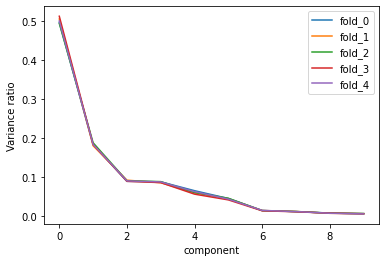

In [28]:
for fold_id in range(5):

    # it does not really matter whether we look at normalized features or their orig values,
    # because normalization of val set is done using train set statistics
    x_tr, y_tr = noerror_pipeline.transform_train(fold_id)
    x_val, y_val = noerror_pipeline.transform_val(fold_id)

    from sklearn.decomposition import PCA
    pca = PCA()

    pca_tr = pca.fit(x_tr)
    plt.plot(pca.explained_variance_ratio_, label=f"fold_{fold_id}")

plt.xlabel('component')
plt.ylabel('Variance ratio')
plt.legend()

We can see a significant drop of variance ratio.  
Let's try to minimize number of used feature and hence the size of our model.

In [29]:
class PCATransform:
    def __init__(self, split, n_components: int=None):
        self.split = split
        self.transformers = [PCA(n_components=n_components) if n_components
                             else PCA() for _ in self.split]

    def __call__(self, x, y, split_id: int=None):
        ids = sorted(x.index.tolist())
        if split_id is not None:
            return self.transformers[split_id].transform(x), y

        for i, (ids_tr, ids_val) in enumerate(self.split):
            if ids == sorted(ids_tr):
                return self.transformers[i].fit_transform(x), y
            elif ids == sorted(ids_val):
                return self.transformers[i].transform(x), y

    def __getitem__(self, idx: int):
        return self.transformerss[idx]

In [30]:
pca_pipeline = DataPipe(X, Y, split,
                         partial(drop_columns, to_drop=error_drop),
                         Normalize(split, split_statistics),
                         PCATransform(split, 2)
                         )

def objective_pca_logreg(trial, x_tr, y_tr, x_val, y_val, model_params: dict) -> tuple:
    C = trial.suggest_float("C", 1e-6, 1e6)
    n_components = trial.suggest_int("n_components", 1, x_tr.shape[-1])
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)

    # train
    model = LogisticRegression(C=C, l1_ratio=l1_ratio, **model_params)
    model = model.fit(x_tr[:, :n_components], y_tr)

    # eval
    probas = model.predict_proba(x_val[:, :n_components])

    acc, f1, bce, roc_auc, prec, rec = compute_metrics(y_val, probas)
    return acc, f1, bce, roc_auc, prec, rec

model_params = {'solver': 'saga', 'n_jobs': -1, 'penalty': 'elasticnet', 'max_iter': 10000}
models_pca, studies_pca, metrics_pca = train_logreg(pca_pipeline, objective_logreg, model_params, drop_params=['n_components'])

### SPLIT # 0 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 5132.60330408449, 'l1_ratio': 0.7656075294753366}
### SPLIT # 1 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 158063.01894328307, 'l1_ratio': 0.6121524815937365}
### SPLIT # 2 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 2678.5275460734583, 'l1_ratio': 0.1297957625268169}
### SPLIT # 3 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 895523.6788203963, 'l1_ratio': 0.3807770444183509}
### SPLIT # 4 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'C': 911039.1169452496, 'l1_ratio': 0.8097970008071453}


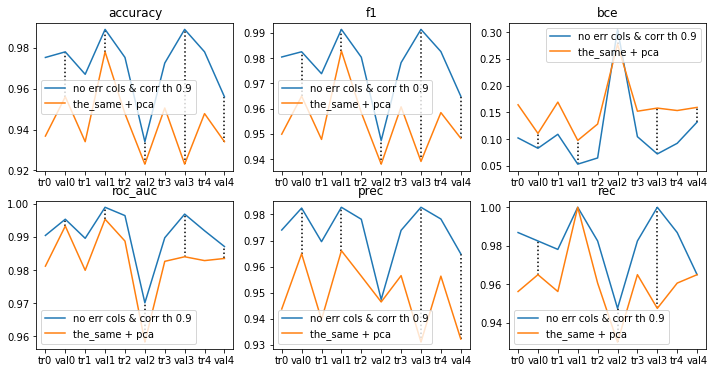

In [31]:
plot_metrics(metrics_ne, metrics_pca, "no err cols & corr th 0.9", "the_same + pca") # black dot lines connects val metrics

Different values of `n_components` for PCA lead to decreased perfomance, if `n_components` == `n_features` of `no_error` (10) baseline then perfomance is the same, hence PCA is useless.
(I have also put `n_components` as optuna study parameter and it resulted in value of `n_components == 9`)   
So far we've been using `SAGA` optimizer, let's try `no_error` baseline with classic SGDCLassifier.


In [32]:
from sklearn.linear_model import SGDClassifier


def objective_SGD(trial, x_tr, y_tr, x_val, y_val,
                  model_params: dict, architecture_module) -> tuple:
    alpha = trial.suggest_float("alpha", 1e-6, 1e6)
    l1_ratio = trial.suggest_float('l1_ratio', 0, 1)
    eta0 = trial.suggest_float('eta0', 1e-6, 1e-1)

    # train
    model = architecture_module(alpha=alpha, eta0=eta0, l1_ratio=l1_ratio, **model_params)
    model = model.fit(x_tr, y_tr)

    # eval
    probas = model.predict_proba(x_val)

    acc, f1, bce, roc_auc, prec, rec = compute_metrics(y_val, probas)
    return acc, f1, bce, roc_auc, prec, rec

model_params = {'loss': 'log', 'n_jobs': -1, 'penalty': 'elasticnet', 'max_iter': 10000, 'learning_rate': 'constant'}
models_sgd, studies_sgd, metrics_sgd = train_logreg(noerror_pipeline, objective_SGD, model_params, architecture_module=SGDClassifier)

### SPLIT # 0 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 714238.1297166011, 'l1_ratio': 0.8572418520558323, 'eta0': 0.031011148427539575}
### SPLIT # 1 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 899144.8235962526, 'l1_ratio': 0.22003694842985644, 'eta0': 0.0382059638608066}
### SPLIT # 2 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 260017.57727441378, 'l1_ratio': 0.28132350569124887, 'eta0': 0.0168509109266535}
### SPLIT # 3 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 805976.4728838928, 'l1_ratio': 0.5845534113101888, 'eta0': 0.06209332580111228}
### SPLIT # 4 ###


/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

{'alpha': 684084.409984009, 'l1_ratio': 0.7879095089497196, 'eta0': 0.01598332023242352}


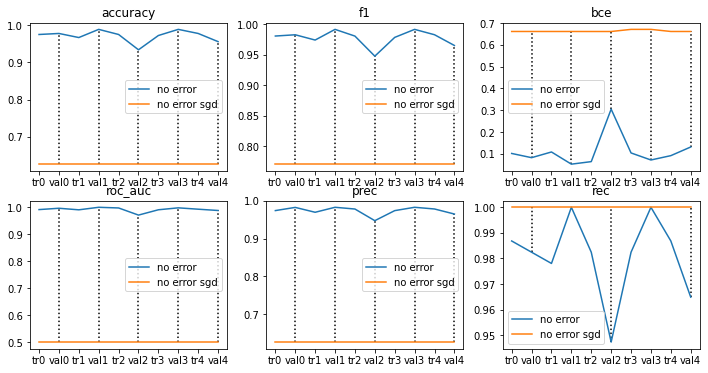

In [33]:
plot_metrics(metrics_ne, metrics_sgd, 'no error', 'no error sgd') 

Don't know what happened with sgd, but since saga works well, we'll use it.

## Parzen Window method